# Hackathon 1

## Problem statement 

Within the context of human resources (HR), attrition is a reduction in the workforce caused by retirement or resignation. This is a serious problem faced by several organizations around the world as attrition is economically damaging to the organizations as the replacement employees have to be hired at a cost and trained again at a cost. High Rates of Attrition also damages the brand value of the company.
 
Now the Dataset belongs to a very fast-growing company. This company has witnessed several employees leaving the company in the last 3 years. The company’s HR team has always been reactive to attrition but now the team wants to be proactive and wished to predict attrition of employees using the data they have in hand. 
 
The goal here is to predict whether an employee will leave the company based upon the various variables given in the dataset.
 
Working with Data
Data has been split into two groups and provided in the module:
training set 
test set 
The training set is used to build your machine learning model. For the training set, we provide the attrition details of an employee.
The test set should be used to see how well your model performs on unseen data. For the test set, it is your job to predict the attrition value of an employee.
Metric to measure

Accuracy is the metric to measure the performance in this Hackathon.

Accuracy= (TP+TN)/(TP+TN+FP+FN)

Submission File Format:

You are to submit a CSV file with exactly 2630 entries plus a header row. The file should have exactly two columns

1.      EmployeeID (sorted in any order)
2.      Attrition

In [1]:
import pandas as pd  # for data manipulation and analysis
import numpy as np # for numerical computation and analysis

import matplotlib.pyplot as plt # for controling data visualization plots
import seaborn as sns # for creating more complex visualizations.

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# lets import all the necessary libraries and modules.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, make_scorer
from sklearn.ensemble import GradientBoostingClassifier

#### Read the Train dataset and do exploratory data analysis

In [3]:
# Read the dataset using read_csv function of pandas library
# Reading training dataset.
df = pd.read_csv('Train_Dataset_(1).csv')

In [4]:
# lets check head of the dataset
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [5]:
# lets check tail of the dataset
df.tail()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
7805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# what is the shape of the dataset
df.shape

(7810, 22)

In [7]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [8]:
# check duplicate data 
df.duplicated().sum() 

2629

In [9]:
df[df.duplicated()]

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
5181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop_duplicates()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,5115177.0,0.0,NaN,Rarely,Marketing,9.0,CA,Female,66.0,1.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,Single,17109.0
5177,5115178.0,0.0,29.0,Rarely,Analytics,NaN,CA,Female,62.0,4.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,M,17532.0
5178,5115179.0,0.0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,Divorsed,17942.0
5179,5115180.0,1.0,NaN,Yes,Sales,13.0,Statistics,Male,74.0,4.0,...,5.0,1.0,1.0,0.0,23.0,1.0,0.0,0.0,Divorsed,17033.0


In [11]:
df_copy = df.copy()

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.shape

(5181, 22)

In [14]:
# lets check the missing values in the dataset
df.isnull().sum()

EmployeeID              1
Attrition               1
Age                   317
TravelProfile           1
Department            125
HomeToWork            256
EducationField          1
Gender                 47
HourlnWeek            288
Involvement             1
WorkLifeBalance         1
Designation            39
JobSatisfaction         1
ESOPs                   1
NumCompaniesWorked      1
OverTime                1
SalaryHikelastYear    170
WorkExperience        188
LastPromotion          71
CurrentProfile        312
MaritalStatus           1
MonthlyIncome          94
dtype: int64

In [15]:
def outliers(col):
    sorted(col)
    
    q1, q3 = np.percentile(col, [25,75])
    iqr = q3 - q1
    
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    
    return lw, uw

for i in df.columns:
    if df[i].dtype != 'object':
        lw, uw = outliers(df[i])
        print('Number of Outliers in', i, 'is', ((df[i] < lw) | (df[i] > uw)).sum() / df.shape[0] * 100)
# output values are in percentages.

Number of Outliers in EmployeeID is 0.0
Number of Outliers in Attrition is 0.0
Number of Outliers in Age is 0.0
Number of Outliers in HomeToWork is 0.0
Number of Outliers in HourlnWeek is 0.0
Number of Outliers in Involvement is 0.0
Number of Outliers in WorkLifeBalance is 0.0
Number of Outliers in JobSatisfaction is 0.0
Number of Outliers in ESOPs is 0.0
Number of Outliers in NumCompaniesWorked is 0.0
Number of Outliers in OverTime is 0.0
Number of Outliers in SalaryHikelastYear is 0.0
Number of Outliers in WorkExperience is 0.0
Number of Outliers in LastPromotion is 0.0
Number of Outliers in CurrentProfile is 0.0
Number of Outliers in MonthlyIncome is 0.0


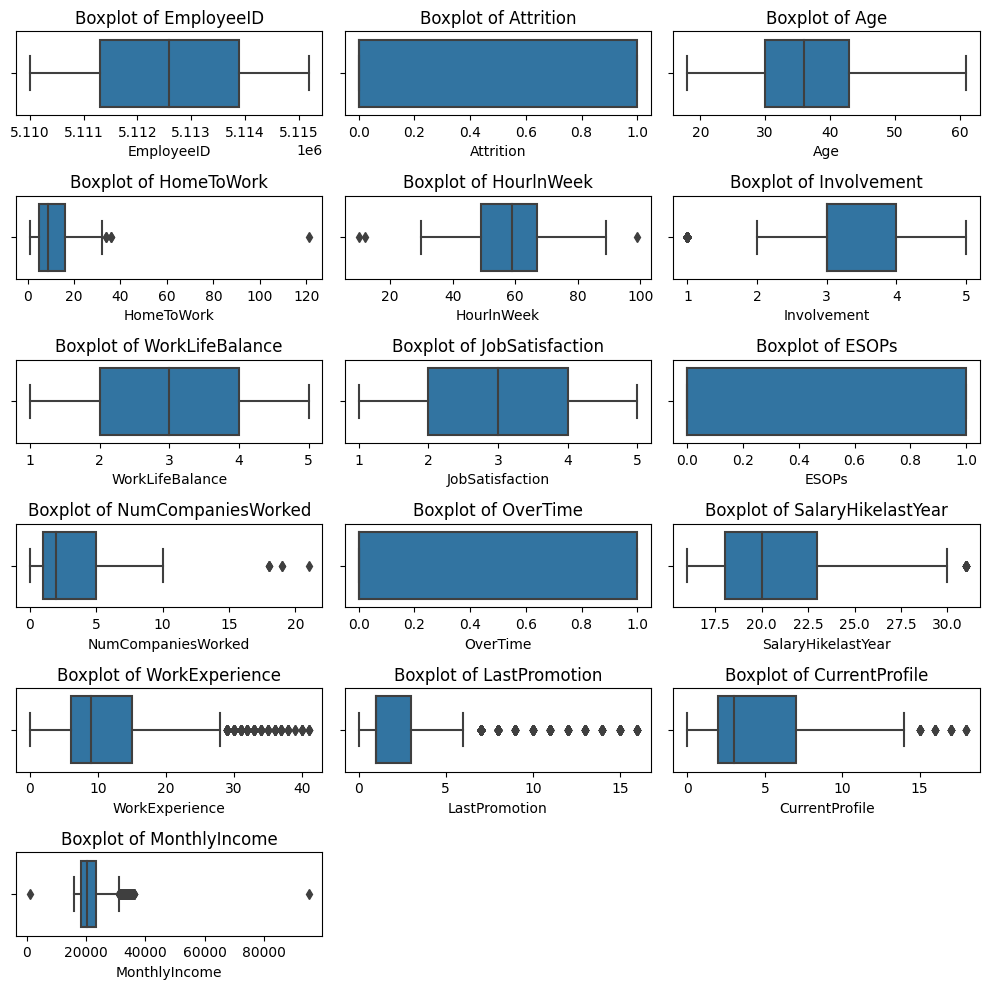

In [16]:
import matplotlib.pyplot as plt
#Check for presence of outliers in each feature
plt.figure(figsize = (10,10))
feature_list =df.drop(['TravelProfile','Department','EducationField','Gender','Designation','MaritalStatus'], axis = 1).columns
for i in range(len(feature_list)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [17]:
# with this consideration, the outliers are important in analyzing the data, we are not going to treat them.

In [18]:
# Treating outliers.
for i in df.columns:
    if df[i].dtype != 'object':
        lw, uw = outliers(df[i])
        df[i] = np.where(df[i] < lw, lw, df[i])
        df[i] = np.where(df[i] > uw, uw, df[i])

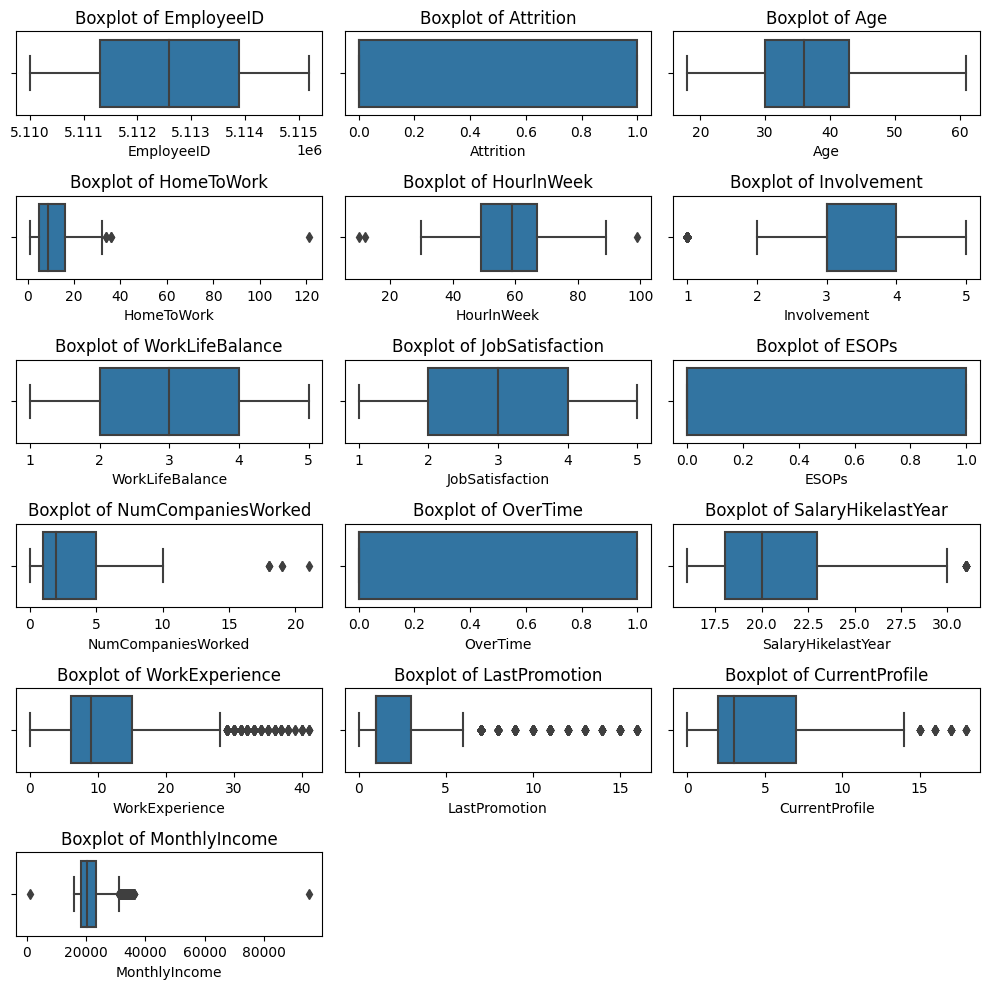

In [19]:
import matplotlib.pyplot as plt
#Check for presence of outliers in each feature
plt.figure(figsize = (10,10))
feature_list =df.drop(['TravelProfile','Department','EducationField','Gender','Designation','MaritalStatus'], axis = 1).columns
for i in range(len(feature_list)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [20]:
# ok. now we will proceed with the next step.

In [21]:
df.shape

(5181, 22)

#### imputing null values 

In [22]:
df.isnull().sum()

EmployeeID              1
Attrition               1
Age                   317
TravelProfile           1
Department            125
HomeToWork            256
EducationField          1
Gender                 47
HourlnWeek            288
Involvement             1
WorkLifeBalance         1
Designation            39
JobSatisfaction         1
ESOPs                   1
NumCompaniesWorked      1
OverTime                1
SalaryHikelastYear    170
WorkExperience        188
LastPromotion          71
CurrentProfile        312
MaritalStatus           1
MonthlyIncome          94
dtype: int64

In [23]:
# there are three attributes are having missing value more than 5 %.
# they are Age, HourInWeek, CurrentProfile

In [24]:
# we will impute missing values in these three attributes with the knn imputer.
from sklearn.impute import KNNImputer

In [25]:
imputer = KNNImputer()

In [26]:
missing_percentages = df.isnull().sum() * 100 / len(df)
missing_percentages

EmployeeID            0.019301
Attrition             0.019301
Age                   6.118510
TravelProfile         0.019301
Department            2.412662
HomeToWork            4.941131
EducationField        0.019301
Gender                0.907161
HourlnWeek            5.558772
Involvement           0.019301
WorkLifeBalance       0.019301
Designation           0.752750
JobSatisfaction       0.019301
ESOPs                 0.019301
NumCompaniesWorked    0.019301
OverTime              0.019301
SalaryHikelastYear    3.281220
WorkExperience        3.628643
LastPromotion         1.370392
CurrentProfile        6.022003
MaritalStatus         0.019301
MonthlyIncome         1.814322
dtype: float64

In [27]:
columns_to_impute = missing_percentages[missing_percentages > 3].index
columns_to_impute

Index(['Age', 'HomeToWork', 'HourlnWeek', 'SalaryHikelastYear',
       'WorkExperience', 'CurrentProfile'],
      dtype='object')

In [28]:
columns_data = df[columns_to_impute]
df[columns_to_impute]

,Age,HomeToWork,HourlnWeek,SalaryHikelastYear,WorkExperience,CurrentProfile
0,35.0,5.0,69.0,20.0,7.0,NaN
1,32.0,5.0,62.0,20.0,4.0,NaN
2,31.0,5.0,45.0,26.0,12.0,3.0
3,34.0,10.0,32.0,23.0,5.0,3.0
4,37.0,27.0,49.0,21.0,12.0,9.0
...,...,...,...,...,...,...
5176,NaN,9.0,66.0,23.0,8.0,2.0
5177,29.0,NaN,62.0,19.0,8.0,3.0
5178,26.0,26.0,61.0,28.0,8.0,7.0
5179,NaN,13.0,74.0,23.0,1.0,0.0


In [29]:

imputer = KNNImputer(n_neighbors=5)

In [30]:
imputed_columns_data = pd.DataFrame(imputer.fit_transform(columns_data), columns=columns_data.columns)
imputed_columns_data

,Age,HomeToWork,HourlnWeek,SalaryHikelastYear,WorkExperience,CurrentProfile
0,35.000000,5.000000,69.000000,20.000000,7.000000,2.200000
1,32.000000,5.000000,62.000000,20.000000,4.000000,2.800000
2,31.000000,5.000000,45.000000,26.000000,12.000000,3.000000
3,34.000000,10.000000,32.000000,23.000000,5.000000,3.000000
4,37.000000,27.000000,49.000000,21.000000,12.000000,9.000000
...,...,...,...,...,...,...
5176,44.400000,9.000000,66.000000,23.000000,8.000000,2.000000
5177,29.000000,1.600000,62.000000,19.000000,8.000000,3.000000
5178,26.000000,26.000000,61.000000,28.000000,8.000000,7.000000
5179,30.200000,13.000000,74.000000,23.000000,1.000000,0.000000


In [31]:
df[columns_to_impute] = imputed_columns_data
df[columns_to_impute] 

,Age,HomeToWork,HourlnWeek,SalaryHikelastYear,WorkExperience,CurrentProfile
0,35.000000,5.000000,69.000000,20.000000,7.000000,2.200000
1,32.000000,5.000000,62.000000,20.000000,4.000000,2.800000
2,31.000000,5.000000,45.000000,26.000000,12.000000,3.000000
3,34.000000,10.000000,32.000000,23.000000,5.000000,3.000000
4,37.000000,27.000000,49.000000,21.000000,12.000000,9.000000
...,...,...,...,...,...,...
5176,44.400000,9.000000,66.000000,23.000000,8.000000,2.000000
5177,29.000000,1.600000,62.000000,19.000000,8.000000,3.000000
5178,26.000000,26.000000,61.000000,28.000000,8.000000,7.000000
5179,30.200000,13.000000,74.000000,23.000000,1.000000,0.000000


In [32]:
df.to_csv('imputed_dataset.csv', index=False)

In [33]:
df = pd.read_csv('imputed_dataset.csv') 

In [34]:
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,2.2,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,2.8,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [35]:
df.isnull().sum()

EmployeeID              1
Attrition               1
Age                     0
TravelProfile           1
Department            125
HomeToWork              0
EducationField          1
Gender                 47
HourlnWeek              0
Involvement             1
WorkLifeBalance         1
Designation            39
JobSatisfaction         1
ESOPs                   1
NumCompaniesWorked      1
OverTime                1
SalaryHikelastYear      0
WorkExperience          0
LastPromotion          71
CurrentProfile          0
MaritalStatus           1
MonthlyIncome          94
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,4811.0,5.112589e+06,1495.544743,5110001.0,5111298.5,5112591.0,5113881.5,5115180.0
Attrition,4811.0,2.679277e-01,0.442926,0.0,0.0,0.0,1.0,1.0
Age,4811.0,3.713091e+01,9.061940,18.0,30.5,36.0,43.0,61.0
HomeToWork,4811.0,1.108875e+01,8.370327,1.0,5.0,9.0,16.0,121.0
HourlnWeek,4811.0,5.794932e+01,12.805304,10.0,49.5,59.0,67.0,99.0
Involvement,4811.0,3.220328e+00,0.869733,1.0,3.0,3.0,4.0,5.0
WorkLifeBalance,4811.0,3.021201e+00,1.406684,1.0,2.0,3.0,4.0,5.0
JobSatisfaction,4811.0,3.146331e+00,1.342956,1.0,2.0,3.0,4.0,5.0
ESOPs,4811.0,4.934525e-01,0.500009,0.0,0.0,0.0,1.0,1.0
NumCompaniesWorked,4811.0,3.202661e+00,2.595270,0.0,1.0,2.0,5.0,21.0


In [40]:
# analysis.

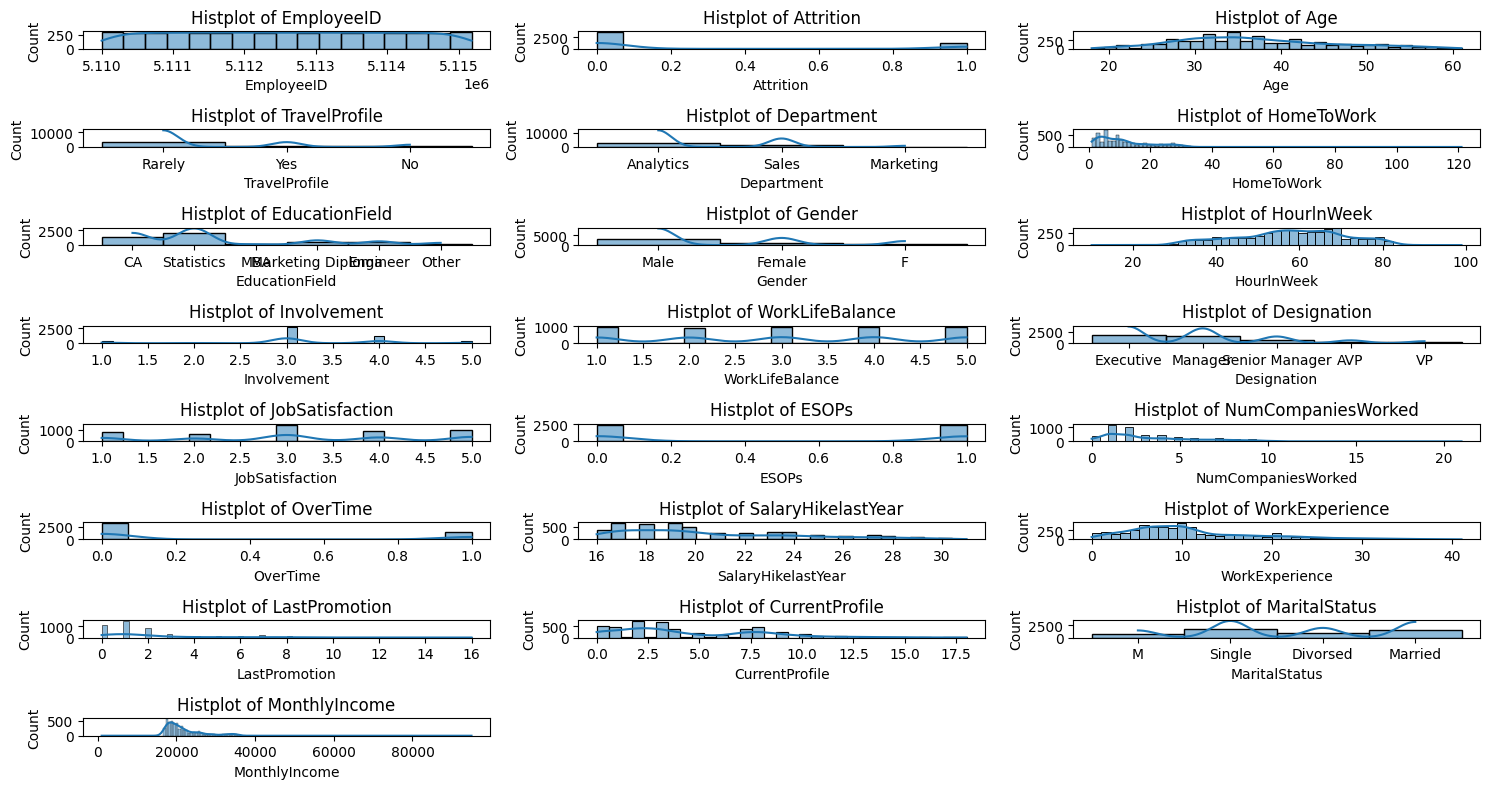

In [41]:
# let's check the skewness in the objective dataset.
# we are checking this to see whether our data points are skewed at one end or not.
plt.figure(figsize = (15,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(8,3, i + 1)
    sns.histplot(x = df[feature_list[i]], data = df, kde = True)
    plt.title('Histplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [42]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())

Rarely    3378
Yes        982
No         451
Name: TravelProfile, dtype: int64
Analytics    3048
Sales        1553
Marketing     210
Name: Department, dtype: int64
Statistics           1980
CA                   1447
Marketing Diploma     566
Engineer              447
Other                 264
MBA                   107
Name: EducationField, dtype: int64
Male      2882
Female    1239
F          690
Name: Gender, dtype: int64
Executive         1858
Manager           1657
Senior Manager     753
AVP                321
VP                 222
Name: Designation, dtype: int64
Single      1630
Married     1533
Divorsed     948
M            700
Name: MaritalStatus, dtype: int64


In [43]:
df['MaritalStatus'] = np.where(df.MaritalStatus == 'M', 'Married', df.MaritalStatus)

In [44]:
df['Gender'] = np.where(df.Gender == 'F', 'Female', df.Gender)

In [45]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())

Rarely    3378
Yes        982
No         451
Name: TravelProfile, dtype: int64
Analytics    3048
Sales        1553
Marketing     210
Name: Department, dtype: int64
Statistics           1980
CA                   1447
Marketing Diploma     566
Engineer              447
Other                 264
MBA                   107
Name: EducationField, dtype: int64
Male      2882
Female    1929
Name: Gender, dtype: int64
Executive         1858
Manager           1657
Senior Manager     753
AVP                321
VP                 222
Name: Designation, dtype: int64
Married     2233
Single      1630
Divorsed     948
Name: MaritalStatus, dtype: int64


In [46]:
df.columns

Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department',
       'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

In [47]:
x = df.drop(['Attrition'], axis = 1)
y = df[['Attrition']]

In [48]:
x.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,2.2,Married,18932.0
1,5110002.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,2.8,Single,18785.0
2,5110003.0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

#### There are 6 variables which needs to be encoded.

In [51]:
# for designation variable we are going to use ordinal encoding 

In [52]:
from sklearn.preprocessing import OrdinalEncoder
desi = OrdinalEncoder().fit_transform(x[['Designation']])

In [53]:
x['Designation'] = desi

In [54]:
x.Designation.value_counts() #here 1= executive 2 = manager, 3 = senior manager, 0 = avp, 4 = vp

1.0    1858
2.0    1657
3.0     753
0.0     321
4.0     222
Name: Designation, dtype: int64

In [55]:
trav = le.fit_transform(x[['TravelProfile']])

In [56]:
x['TravelProfile'] = trav

In [57]:
x.TravelProfile.value_counts()   # 1 = rarely 2 = yes , 0 = no

1    3378
2     982
0     451
Name: TravelProfile, dtype: int64

In [58]:
dept = le.fit_transform(x[['Department']])

In [59]:
x['Department'] =dept

In [60]:
x.Department.value_counts() # 0 = analytics, 2 = sales, 3= marketing 

0    3048
2    1553
1     210
Name: Department, dtype: int64

In [61]:
edu = le.fit_transform(x[['EducationField']])

In [62]:
x['EducationField'] = edu

In [63]:
x.EducationField.value_counts() # 5 = statistic. 0= CA, 3 = marketing diploma, 1 = engineer, 4 = other , 2 = MBA 

5    1980
0    1447
3     566
1     447
4     264
2     107
Name: EducationField, dtype: int64

In [64]:
marr = le.fit_transform(x[['MaritalStatus']])

In [65]:
x['MaritalStatus'] = marr

In [66]:
x.MaritalStatus.value_counts() # 1. married   2. single    0 = divorce

1    2233
2    1630
0     948
Name: MaritalStatus, dtype: int64

In [67]:
x.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,35.0,1,0,5.0,0,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,2.2,1,18932.0
1,5110002.0,32.0,2,2,5.0,5,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,2.8,2,18785.0
2,5110003.0,31.0,1,0,5.0,5,Female,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,2,22091.0
3,5110004.0,34.0,2,2,10.0,5,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,0,20302.0
4,5110005.0,37.0,0,0,27.0,5,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,0,21674.0


In [68]:
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,2.2,Married,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,2.8,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,Female,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [69]:
x.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,35.0,1,0,5.0,0,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,2.2,1,18932.0
1,5110002.0,32.0,2,2,5.0,5,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,2.8,2,18785.0
2,5110003.0,31.0,1,0,5.0,5,Female,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,2,22091.0
3,5110004.0,34.0,2,2,10.0,5,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,0,20302.0
4,5110005.0,37.0,0,0,27.0,5,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,0,21674.0


In [70]:
x.columns

Index(['EmployeeID', 'Age', 'TravelProfile', 'Department', 'HomeToWork',
       'EducationField', 'Gender', 'HourlnWeek', 'Involvement',
       'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs',
       'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear',
       'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus',
       'MonthlyIncome'],
      dtype='object')

In [71]:
for i in x[['TravelProfile','Department','EducationField','MaritalStatus']]:
    print(x[i].value_counts())

1    3378
2     982
0     451
Name: TravelProfile, dtype: int64
0    3048
2    1553
1     210
Name: Department, dtype: int64
5    1980
0    1447
3     566
1     447
4     264
2     107
Name: EducationField, dtype: int64
1    2233
2    1630
0     948
Name: MaritalStatus, dtype: int64


In [72]:
x.shape

(4811, 21)

In [73]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4811 entries, 0 to 5179
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          4811 non-null   float64
 1   Age                 4811 non-null   float64
 2   TravelProfile       4811 non-null   int32  
 3   Department          4811 non-null   int32  
 4   HomeToWork          4811 non-null   float64
 5   EducationField      4811 non-null   int32  
 6   Gender              4811 non-null   object 
 7   HourlnWeek          4811 non-null   float64
 8   Involvement         4811 non-null   float64
 9   WorkLifeBalance     4811 non-null   float64
 10  Designation         4811 non-null   float64
 11  JobSatisfaction     4811 non-null   float64
 12  ESOPs               4811 non-null   float64
 13  NumCompaniesWorked  4811 non-null   float64
 14  OverTime            4811 non-null   float64
 15  SalaryHikelastYear  4811 non-null   float64
 16  WorkEx

In [74]:
#  as in our dataset employee id is not going to make any value in independent variables, hence we will remove it.

In [75]:
x = pd.get_dummies(x, drop_first = True)
x.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Gender_Male
0,5110001.0,35.0,1,0,5.0,0,69.0,1.0,1.0,1.0,...,1.0,1.0,1.0,20.0,7.0,2.0,2.2,1,18932.0,1
1,5110002.0,32.0,2,2,5.0,5,62.0,4.0,3.0,1.0,...,0.0,8.0,0.0,20.0,4.0,1.0,2.8,2,18785.0,0
2,5110003.0,31.0,1,0,5.0,5,45.0,5.0,3.0,2.0,...,1.0,3.0,0.0,26.0,12.0,1.0,3.0,2,22091.0,0
3,5110004.0,34.0,2,2,10.0,5,32.0,3.0,2.0,2.0,...,1.0,1.0,0.0,23.0,5.0,1.0,3.0,0,20302.0,0
4,5110005.0,37.0,0,0,27.0,5,49.0,3.0,4.0,2.0,...,1.0,8.0,0.0,21.0,12.0,1.0,9.0,0,21674.0,0


In [76]:
dfx = x.drop(['EmployeeID'],axis = 1)
dfx

,Age,TravelProfile,Department,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Gender_Male
0,35.0,1,0,5.0,0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,2.2,1,18932.0,1
1,32.0,2,2,5.0,5,62.0,4.0,3.0,1.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,2.8,2,18785.0,0
2,31.0,1,0,5.0,5,45.0,5.0,3.0,2.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,2,22091.0,0
3,34.0,2,2,10.0,5,32.0,3.0,2.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,0,20302.0,0
4,37.0,0,0,27.0,5,49.0,3.0,4.0,2.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,0,21674.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,36.0,1,0,13.0,0,53.0,3.0,3.0,2.0,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.0,2,22142.0,0
5176,44.4,1,1,9.0,0,66.0,1.0,4.0,1.0,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,2,17109.0,0
5177,29.0,1,0,1.6,0,62.0,4.0,2.0,1.0,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,1,17532.0,0
5178,26.0,1,1,26.0,5,61.0,3.0,4.0,1.0,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,0,17942.0,0


In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
ss = StandardScaler()

In [79]:
dfx1 = dfx.copy()

In [80]:
dfx_scale = ss.fit_transform(dfx)

In [81]:
dfx_scale = pd.DataFrame(dfx_scale, columns = dfx.columns)

In [82]:
dfx_scale.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Gender_Male
0,-0.235174,-0.206501,-0.743334,-0.727497,-1.270149,0.863066,-2.553151,-1.437005,-0.759863,-1.598380,1.013182,-0.848809,1.496573,-0.179260,-0.574095,-0.187813,-0.624809,-0.197390,-0.611150,0.818124
1,-0.566263,1.664450,1.413589,-0.727497,1.024514,0.316361,0.896543,-0.015073,-0.759863,-0.853677,-0.986990,1.848685,-0.668193,-0.179260,-0.961857,-0.493693,-0.457125,1.195049,-0.641626,-1.222309
2,-0.676626,-0.206501,-0.743334,-0.727497,1.024514,-1.011352,2.046441,-0.015073,0.282241,-0.853677,1.013182,-0.078097,-0.668193,1.459389,0.072174,-0.493693,-0.401230,1.195049,0.043781,-1.222309
3,-0.345537,1.664450,1.413589,-0.130087,1.024514,-2.026662,-0.253355,-0.726039,0.282241,0.635730,1.013182,-0.848809,-0.668193,0.640065,-0.832603,-0.493693,-0.401230,-1.589829,-0.327119,-1.222309
4,-0.014447,-2.077451,-0.743334,1.901109,1.024514,-0.698949,-0.253355,0.695892,0.282241,0.635730,1.013182,1.848685,-0.668193,0.093848,0.072174,-0.493693,1.275607,-1.589829,-0.042672,-1.222309


In [83]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4811 entries, 0 to 5179
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4811 non-null   float64
 1   TravelProfile       4811 non-null   int32  
 2   Department          4811 non-null   int32  
 3   HomeToWork          4811 non-null   float64
 4   EducationField      4811 non-null   int32  
 5   HourlnWeek          4811 non-null   float64
 6   Involvement         4811 non-null   float64
 7   WorkLifeBalance     4811 non-null   float64
 8   Designation         4811 non-null   float64
 9   JobSatisfaction     4811 non-null   float64
 10  ESOPs               4811 non-null   float64
 11  NumCompaniesWorked  4811 non-null   float64
 12  OverTime            4811 non-null   float64
 13  SalaryHikelastYear  4811 non-null   float64
 14  WorkExperience      4811 non-null   float64
 15  LastPromotion       4811 non-null   float64
 16  Curren

In [84]:
y.value_counts()

Attrition
0.0          3522
1.0          1289
dtype: int64

In [85]:
# as our target column is binary, lets use logistic regression model to classify the train data.


### Read test dataset

In [86]:
df_test = pd.read_csv('Test_Dataset_(1).csv')

In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [88]:
df_test.duplicated().sum()

0

In [89]:
df_test.isnull().sum()

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [90]:
for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        print(df_test[i].value_counts())

Rarely    1852
Yes        529
No         249
Name: TravelProfile, dtype: int64
Analytics    1675
Sales         792
Marketing     105
Name: Department, dtype: int64
Statistics           1040
CA                    857
Marketing Diploma     291
Engineer              263
Other                 145
MBA                    34
Name: EducationField, dtype: int64
Male      1574
Female     682
F          344
Name: Gender, dtype: int64
Executive         993
Manager           920
Senior Manager    391
AVP               179
VP                117
Name: Designation, dtype: int64
Single      933
Married     841
Divorsed    477
M           379
Name: MaritalStatus, dtype: int64


In [91]:
df_test['MaritalStatus'] = np.where(df_test.MaritalStatus == 'M', 'Married', df_test.MaritalStatus)

In [92]:
df_test['Gender'] = np.where(df_test.Gender == 'F', 'Female', df_test.Gender)

In [93]:
for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        print(df_test[i].value_counts())

Rarely    1852
Yes        529
No         249
Name: TravelProfile, dtype: int64
Analytics    1675
Sales         792
Marketing     105
Name: Department, dtype: int64
Statistics           1040
CA                    857
Marketing Diploma     291
Engineer              263
Other                 145
MBA                    34
Name: EducationField, dtype: int64
Male      1574
Female    1026
Name: Gender, dtype: int64
Executive         993
Manager           920
Senior Manager    391
AVP               179
VP                117
Name: Designation, dtype: int64
Married     1220
Single       933
Divorsed     477
Name: MaritalStatus, dtype: int64


In [94]:
num = df_test.select_dtypes(include = ['number'])

In [95]:
num.isnull().sum()

EmployeeID              0
Age                   142
HomeToWork            126
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MonthlyIncome          33
dtype: int64

In [96]:
# we will impute missing values in these three attributes with the knn imputer.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [97]:
imputed_columns_data = pd.DataFrame(imputer.fit_transform(num), columns=num.columns)
imputed_columns_data.isnull().sum()

EmployeeID            0
Age                   0
HomeToWork            0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MonthlyIncome         0
dtype: int64

In [98]:
test = pd.concat([df_test.drop(num.columns, axis = 1), imputed_columns_data], axis =1)

In [99]:
test.shape

(2630, 21)

In [100]:
test.isnull().sum()

TravelProfile          0
Department            58
EducationField         0
Gender                30
Designation           30
MaritalStatus          0
EmployeeID             0
Age                    0
HomeToWork             0
HourlnWeek             0
Involvement            0
WorkLifeBalance        0
JobSatisfaction        0
ESOPs                  0
NumCompaniesWorked     0
OverTime               0
SalaryHikelastYear     0
WorkExperience         0
LastPromotion          0
CurrentProfile         0
MonthlyIncome          0
dtype: int64

In [101]:
for i in test.select_dtypes(include = 'object'):
    mode_value = test[i].mode()[0]
    test[i] = test[i].fillna(mode_value)

In [102]:
test.isnull().sum()

TravelProfile         0
Department            0
EducationField        0
Gender                0
Designation           0
MaritalStatus         0
EmployeeID            0
Age                   0
HomeToWork            0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MonthlyIncome         0
dtype: int64

In [103]:
for i in test.select_dtypes(include = 'object'):
    print(test[i].value_counts())

Rarely    1852
Yes        529
No         249
Name: TravelProfile, dtype: int64
Analytics    1733
Sales         792
Marketing     105
Name: Department, dtype: int64
Statistics           1040
CA                    857
Marketing Diploma     291
Engineer              263
Other                 145
MBA                    34
Name: EducationField, dtype: int64
Male      1604
Female    1026
Name: Gender, dtype: int64
Executive         1023
Manager            920
Senior Manager     391
AVP                179
VP                 117
Name: Designation, dtype: int64
Married     1220
Single       933
Divorsed     477
Name: MaritalStatus, dtype: int64


In [104]:
test.head()

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus,EmployeeID,Age,HomeToWork,HourlnWeek,...,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
0,No,Analytics,CA,Male,Executive,Single,6110001.0,18.0,9.0,80.0,...,2.0,3.0,1.0,1.0,0.0,17.0,0.0,0.0,0.0,16904.0
1,Rarely,Analytics,Statistics,Female,Executive,Single,6110002.0,20.0,28.0,59.0,...,3.0,1.0,1.0,2.0,1.0,18.0,2.0,1.0,6.4,18994.0
2,Rarely,Analytics,CA,Female,Executive,Married,6110003.0,50.0,19.0,76.0,...,3.0,5.0,0.0,5.0,1.0,22.0,18.0,3.0,3.0,18587.0
3,Rarely,Sales,Statistics,Female,Manager,Married,6110004.0,32.0,23.0,73.0,...,2.0,3.0,0.0,4.0,1.0,17.0,5.0,3.0,3.0,20559.0
4,Rarely,Analytics,CA,Male,Senior Manager,Married,6110005.0,39.0,7.0,42.0,...,1.0,5.0,1.0,4.0,0.0,20.0,9.0,1.0,7.0,24991.0


In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TravelProfile       2630 non-null   object 
 1   Department          2630 non-null   object 
 2   EducationField      2630 non-null   object 
 3   Gender              2630 non-null   object 
 4   Designation         2630 non-null   object 
 5   MaritalStatus       2630 non-null   object 
 6   EmployeeID          2630 non-null   float64
 7   Age                 2630 non-null   float64
 8   HomeToWork          2630 non-null   float64
 9   HourlnWeek          2630 non-null   float64
 10  Involvement         2630 non-null   float64
 11  WorkLifeBalance     2630 non-null   float64
 12  JobSatisfaction     2630 non-null   float64
 13  ESOPs               2630 non-null   float64
 14  NumCompaniesWorked  2630 non-null   float64
 15  OverTime            2630 non-null   float64
 16  Salary

In [115]:
from sklearn.preprocessing import OrdinalEncoder

In [116]:
oe = OrdinalEncoder()

In [117]:
desi_test = oe.fit_transform(test[['Designation']])

In [118]:
test['Designation'] = desi_test

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
le = LabelEncoder()

In [121]:
trav_test = le.fit_transform(test[['TravelProfile']])

In [122]:
test['TravelProfile'] = trav_test

In [123]:
edu_test = le.fit_transform(test[['EducationField']])

In [124]:
test['EducationField'] = edu_test

In [125]:
dept_test = le.fit_transform(test[['Department']])

In [126]:
test['Department'] = dept_test

In [127]:
mar_test = le.fit_transform(test[['MaritalStatus']])

In [128]:
test['MaritalStatus'] = mar_test

In [129]:
test = pd.get_dummies(test, drop_first = True)

In [130]:
test.head()

,TravelProfile,Department,EducationField,Designation,MaritalStatus,EmployeeID,Age,HomeToWork,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,Gender_Male
0,0,0,0,1.0,2,6110001.0,18.0,9.0,80.0,3.0,...,3.0,1.0,1.0,0.0,17.0,0.0,0.0,0.0,16904.0,1
1,1,0,5,1.0,2,6110002.0,20.0,28.0,59.0,1.0,...,1.0,1.0,2.0,1.0,18.0,2.0,1.0,6.4,18994.0,0
2,1,0,0,1.0,1,6110003.0,50.0,19.0,76.0,3.0,...,5.0,0.0,5.0,1.0,22.0,18.0,3.0,3.0,18587.0,0
3,1,2,5,2.0,1,6110004.0,32.0,23.0,73.0,5.0,...,3.0,0.0,4.0,1.0,17.0,5.0,3.0,3.0,20559.0,0
4,1,0,0,3.0,1,6110005.0,39.0,7.0,42.0,4.0,...,5.0,1.0,4.0,0.0,20.0,9.0,1.0,7.0,24991.0,1


In [131]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [132]:
test_scale = ss.fit_transform(test)

In [133]:
test_scale = pd.DataFrame(test_scale, columns = test.columns)

In [134]:
test_scale.head()

,TravelProfile,Department,EducationField,Designation,MaritalStatus,EmployeeID,Age,HomeToWork,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome,Gender_Male
0,-2.074479,-0.704039,-1.204090,-0.748929,1.161991,-1.731392,-2.120876,-0.278273,1.704263,-0.270986,...,-0.086422,0.990162,-0.834645,-0.701870,-0.998125,-1.451802,-0.811860,-1.286898,-0.969481,0.799782
1,-0.199606,-0.704039,1.063061,-0.748929,1.161991,-1.730075,-1.902092,1.915682,0.082886,-2.533508,...,-1.581743,0.990162,-0.459154,1.424765,-0.726440,-1.200742,-0.506222,0.538791,-0.556970,-1.250341
2,-0.199606,-0.704039,-1.204090,-0.748929,-0.243730,-1.728758,1.379672,0.876440,1.395430,-0.270986,...,1.408900,-1.009935,0.667316,1.424765,0.360297,0.807734,0.105056,-0.431106,-0.637302,-1.250341
3,-0.199606,1.488528,1.063061,0.302129,-0.243730,-1.727441,-0.589386,1.338326,1.163804,1.991535,...,-0.086422,-1.009935,0.291826,1.424765,-0.998125,-0.824153,0.105056,-0.431106,-0.248081,-1.250341
4,-0.199606,-0.704039,-1.204090,1.353188,-0.243730,-1.726124,0.176358,-0.509215,-1.229657,0.860274,...,1.408900,0.990162,0.291826,-0.701870,-0.183072,-0.322034,-0.506222,0.709949,0.626679,0.799782


In [135]:
test_scale1 = test_scale.copy()

In [136]:
test_scale = test_scale.drop(['EmployeeID'], axis = 1)

In [138]:
test_scale.shape

(2630, 20)

### Logistic regression model.

In [140]:
lr_scalemodel = LogisticRegression().fit(dfx_scale, y)
ylr_predict  = lr_scalemodel.predict(dfx_scale)
lr_scalemodel_score = lr_scalemodel.score(dfx_scale, y)
print('The accuracy of LR model for scaled training dataset is:','\n',lr_scalemodel_score )
print('The confusion matrix of LR model for scaled training dataset is:','\n',metrics.confusion_matrix(y, ylr_predict))
print('The classification report of LR model for scaled training dataset is','\n',metrics.classification_report(y, ylr_predict))

The accuracy of LR model for scaled training dataset is: 
 0.8116815630845978
The confusion matrix of LR model for scaled training dataset is: 
 [[3273  249]
 [ 657  632]]
The classification report of LR model for scaled training dataset is 
               precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      3522
         1.0       0.72      0.49      0.58      1289

    accuracy                           0.81      4811
   macro avg       0.78      0.71      0.73      4811
weighted avg       0.80      0.81      0.80      4811



In [150]:
ylr_testpredict  = lr_scalemodel.predict(test_scale)
ylr_testpredict

array([0., 0., 0., ..., 0., 0., 0.])

#### Tune the LR model 

In [106]:
lr_grid = {
    'C' : [0.1, 1, 10],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear','newton-cg','lbfgs','sag','saga'],
    'max_iter': [50, 100, 150]
}



# create grid search object

grid_search = GridSearchCV(lr_scalemodel, lr_grid, cv =5, scoring = 'accuracy')

# fit the grid search object to the data.

grid_search.fit(dfx_scale, y)
print('Best parameters to be used in logistic regression model tuning are:','\n',grid_search.best_params_)
print('accuracy of scaled train dataset after model tuning is:',grid_search.best_score_)

Best parameters to be used in logistic regression model tuning are: 
 {'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy of scaled train dataset after model tuning is: 0.8116847257034173


In [107]:
# now we will use the best parameter to build new model on test dataset.

model_tuned = LogisticRegression(penalty='l1', C = 0.1, solver = 'saga', max_iter = 50)
model_tuned.fit(dfx_scale, y)
ylr_tuned_predict = model_tuned.predict(dfx)


print('f1_score for test dataset of LR after model tuning is:', model_tuned.score(dfx_scale, y))

f1_score for test dataset of LR after model tuning is: 0.8147994180004157


#### LR model boosting - Adaboost

In [108]:
# lets import all the necessary libraries.
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [109]:
ADB_lr_model = AdaBoostClassifier(n_estimators=101, base_estimator = LogisticRegression())
ADB_lr_model.fit(dfx_scale,y)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=101)

In [110]:
# adaptive boosting on logistic regression model build over scaled training dataset.
yabd_predict  = ADB_lr_model.predict(dfx_scale)
lrmodel_abd_score = ADB_lr_model.score(dfx_scale, y)
print('The accuracy of ABD LR model for scaled training dataset is:','\n',lrmodel_abd_score)
print('The confusion matrix of ABD LR model for scaled training dataset is:','\n',metrics.confusion_matrix(y, yabd_predict))
print('The classification report of ABD LR model for scaled training dataset is','\n',metrics.classification_report(y, yabd_predict))


The accuracy of ABD LR model for scaled training dataset is: 
 0.7985865724381626
The confusion matrix of ABD LR model for scaled training dataset is: 
 [[3232  290]
 [ 679  610]]
The classification report of ABD LR model for scaled training dataset is 
               precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      3522
         1.0       0.68      0.47      0.56      1289

    accuracy                           0.80      4811
   macro avg       0.75      0.70      0.71      4811
weighted avg       0.79      0.80      0.79      4811



#### LR model boosting - Gradient boost

In [111]:
gbcl = GradientBoostingClassifier(random_state=42, n_estimators=101, max_depth=5, min_samples_split=5)
gbcl = gbcl.fit(dfx_scale, y)

In [112]:
ygb_predict = gbcl.predict(dfx_scale)
model_gb_score = gbcl.score(dfx_scale, y)
print('The accuracy of GBCL model for scaled training dataset is:','\n',model_gb_score)
print('The confusion matrix of GBCL model for scaled training dataset is:','\n',metrics.confusion_matrix(y, ygb_predict))
print('The classification report of GBCL model for scaled training dataset is','\n',metrics.classification_report(y, ygb_predict))

The accuracy of GBCL model for scaled training dataset is: 
 0.991062149241322
The confusion matrix of GBCL model for scaled training dataset is: 
 [[3519    3]
 [  40 1249]]
The classification report of GBCL model for scaled training dataset is 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3522
         1.0       1.00      0.97      0.98      1289

    accuracy                           0.99      4811
   macro avg       0.99      0.98      0.99      4811
weighted avg       0.99      0.99      0.99      4811



In [152]:
ygb_test_predict = gbcl.predict(test_scale)
ygb_test_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [156]:
predicted_attrition = pd.DataFrame(ygb_test_predict)

In [157]:
predicted_attrition

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2625,1.0
2626,0.0
2627,0.0
2628,0.0


In [158]:
predicted_attrition.to_excel('predicted_attrition.xlsx', index = False)

In [159]:
'''we have used gradient boosting to predict our target variable for the provided test dataset as we are getting the maximum accuracy using this model.'''

'we have used gradient boosting to predict our target variable for the provided test dataset as we are getting the maximum accuracy using this model.'